In [7]:
# Setting working directory as HOME
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [8]:
# Installing yolov8 

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5520.2/8062.4 GB disk)


In [9]:
#importing libraries

from ultralytics import YOLO
from IPython.display import display, Image

In [10]:
# installing additional libraries
!pip install fastapi kaleido python-multipart uvicorn

In [11]:
# uploading dataset from roboflow

!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="THT9CtDUDzP7TPxM9CuV")
project = rf.workspace("projects-phgy0").project("thz")
version = project.version(4)
dataset = version.download("yolov8")


/kaggle/working/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to thz-4 in yolov8:: 100%|██████████| 25924/25924 [00:02<00:00, 9189.86it/s] 


In [12]:
print(os.getcwd())
%cd {HOME}

/kaggle/working/datasets
/kaggle/working


In [13]:
!git clone https://github.com/ultralytics/ultralytics/

Cloning into 'ultralytics'...
remote: Enumerating objects: 23620, done.
remote: Counting objects: 100% (665/665), done.91% (606/665)
remote: Compressing objects: 100% (468/468), done.
remote: Total 23620 (delta 396), reused 341 (delta 197), pack-reused 22955
Receiving objects: 100% (23620/23620), 14.22 MiB | 25.68 MiB/s, done.
Resolving deltas: 100% (16489/16489), done.


In [14]:
#from ultralytics.cfg.models import yolov8
#this is the model configuration we will use for our tutorial 
%cat /kaggle/working/ultralytics/ultralytics/cfg/models/v8/yolov8.yaml

# Ultralytics YOLO 🚀, AGPL-3.0 license
# YOLOv8 object detection model with P3-P5 outputs. For Usage examples see https://docs.ultralytics.com/tasks/detect

# Parameters
nc: 80 # number of classes
scales: # model compound scaling constants, i.e. 'model=yolov8n.yaml' will call yolov8.yaml with scale 'n'
  # [depth, width, max_channels]
  n: [0.33, 0.25, 1024] # YOLOv8n summary: 225 layers,  3157200 parameters,  3157184 gradients,   8.9 GFLOPs
  s: [0.33, 0.50, 1024] # YOLOv8s summary: 225 layers, 11166560 parameters, 11166544 gradients,  28.8 GFLOPs
  m: [0.67, 0.75, 768] # YOLOv8m summary: 295 layers, 25902640 parameters, 25902624 gradients,  79.3 GFLOPs
  l: [1.00, 1.00, 512] # YOLOv8l summary: 365 layers, 43691520 parameters, 43691504 gradients, 165.7 GFLOPs
  x: [1.00, 1.25, 512] # YOLOv8x summary: 365 layers, 68229648 parameters, 68229632 gradients, 258.5 GFLOPs

# YOLOv8.0n backbone
backbone:
  # [from, repeats, module, args]
  - [-1, 1, Conv, [64, 3, 2]] # 0-P1/2
  - [-1, 1, Conv

In [17]:
# training YOLOv8
%time 
!yolo task=detect mode=train model=/kaggle/working/ultralytics/ultralytics/cfg/models/v8/yolov8.yaml pretrained=False data={dataset.location}/data.yaml epochs=25 imgsz=416 plots=True name=yolov8/kaggle/working/runs/detect/yolov8m_results_results cache=True 

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs
WARNING ⚠️ no model scale passed. Assuming scale='n'.

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             

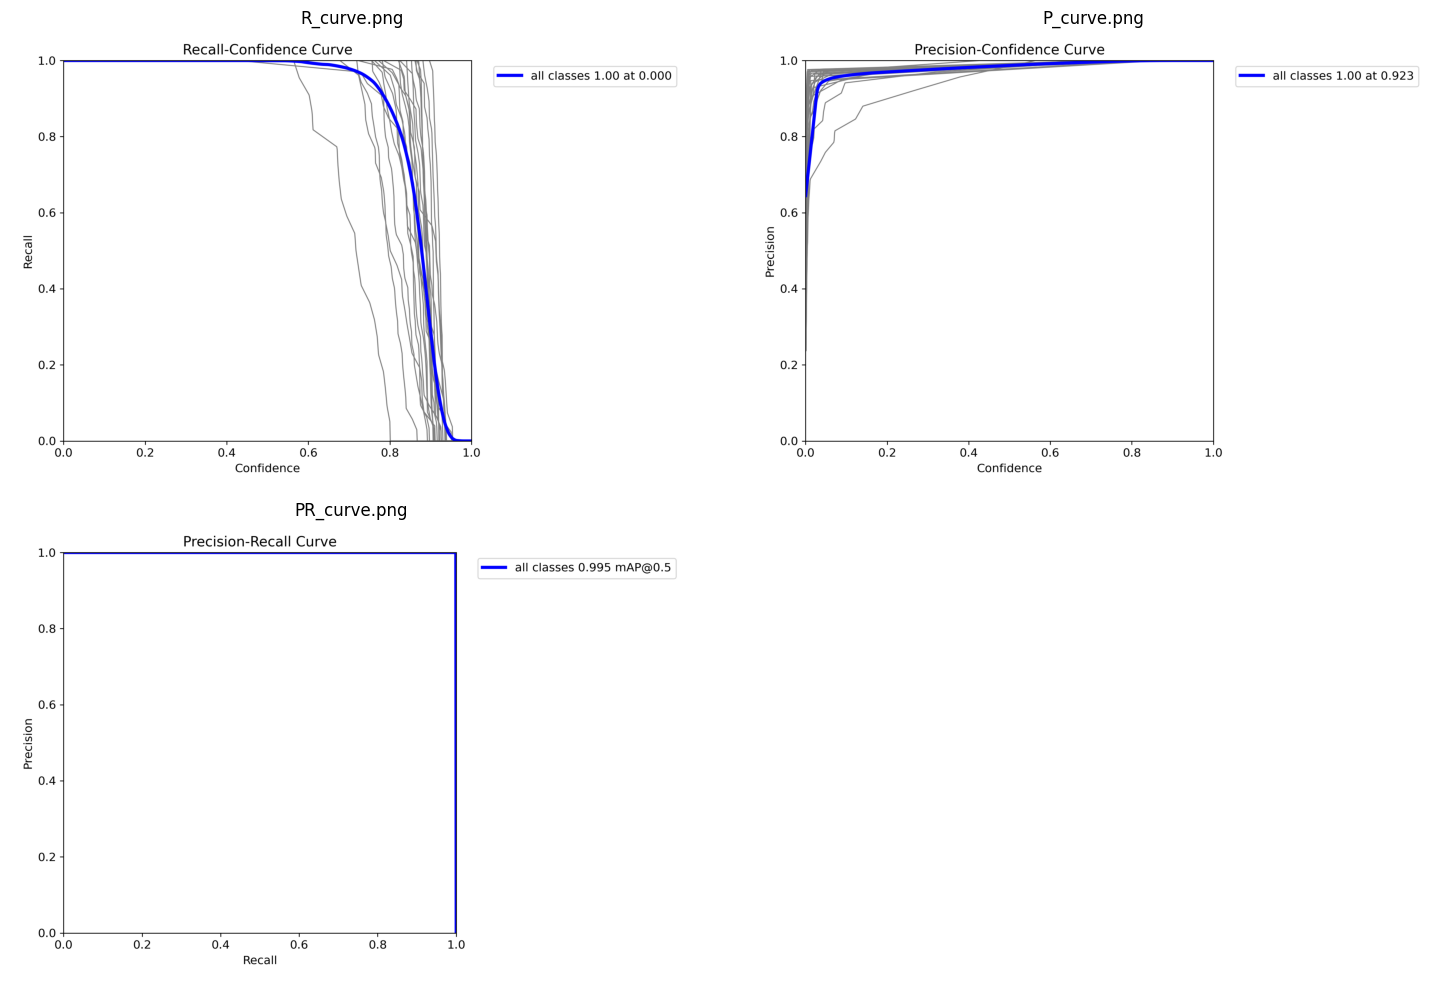

In [21]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_dir = '/kaggle/working/runs/detect/yolov8/kaggle/working/runs/detect/yolov8m_results_results2'
specific_names = ['R_curve.png','P_curve.png','PR_curve.png']  
num_rows = (len(specific_names) + 1) // 2  

plt.figure(figsize=(15, num_rows * 5))  
for i, image_name in enumerate(specific_names):
    image_path = os.path.join(image_dir, image_name)
    if os.path.exists(image_path):
        img = mpimg.imread(image_path)
        plt.subplot(num_rows, 2, i+1) 
        plt.imshow(img)
        plt.title(image_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

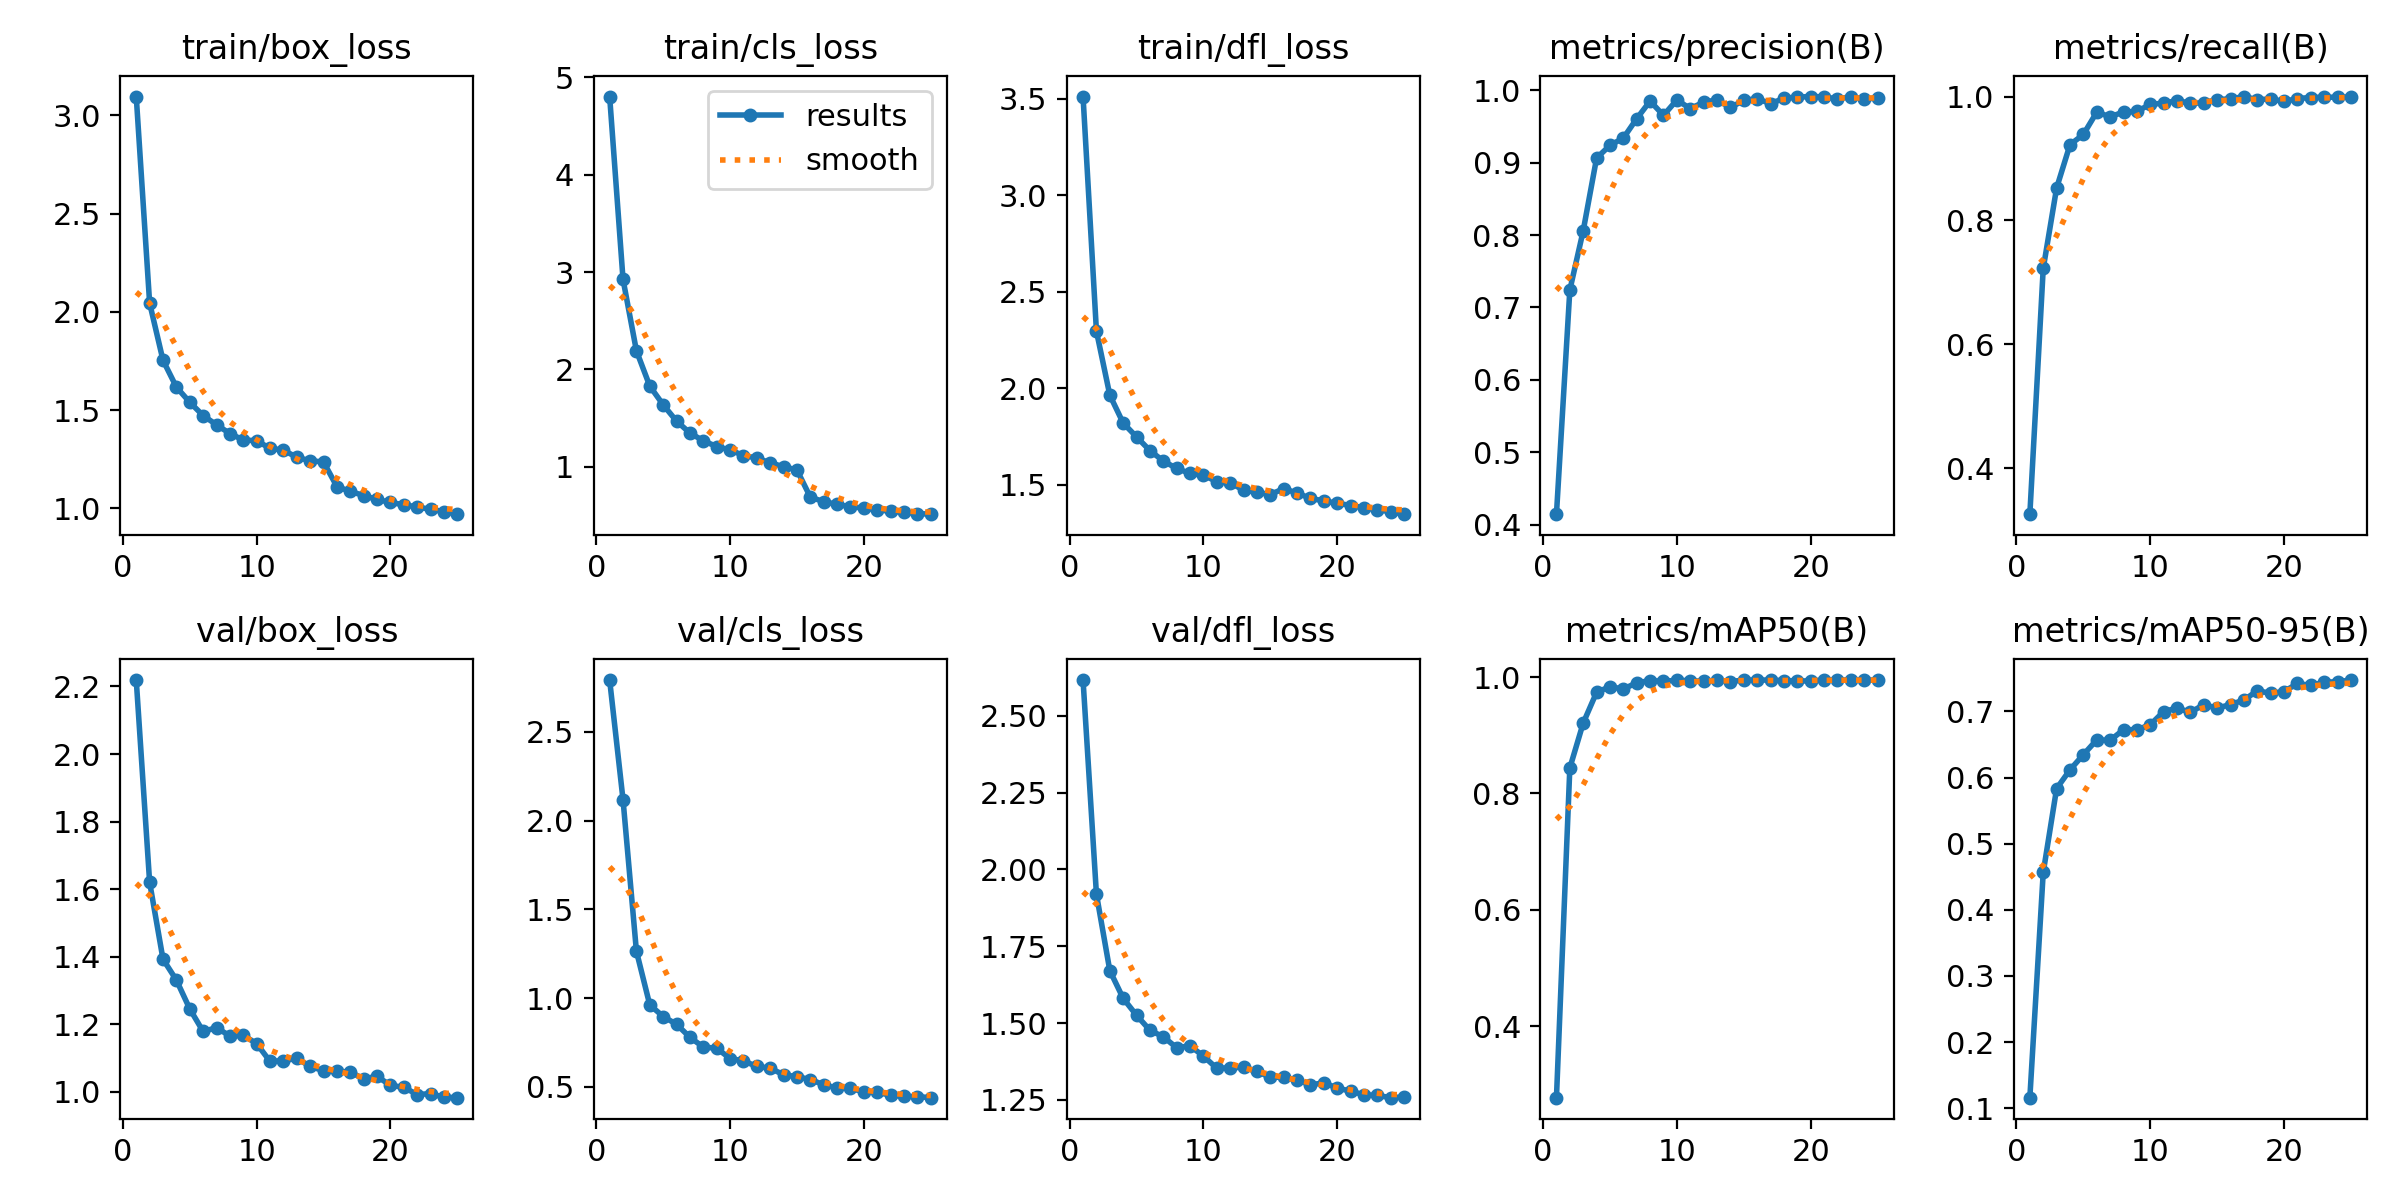

In [27]:
Image(filename=f'/kaggle/working/runs/detect/yolov8/kaggle/working/runs/detect/yolov8m_results_results2/results.png', width=600)

In [24]:
import torch
model = torch.load('/kaggle/working/runs/detect/yolov8/kaggle/working/runs/detect/yolov8m_results_results2/weights/best.pt') 
model['train_metrics']

{'metrics/precision(B)': 0.98973,
 'metrics/recall(B)': 0.99943,
 'metrics/mAP50(B)': 0.995,
 'metrics/mAP50-95(B)': 0.74752,
 'val/box_loss': 0.98278,
 'val/cls_loss': 0.43864,
 'val/dfl_loss': 1.25897,
 'fitness': 0.77227}

In [25]:
model = torch.load('/kaggle/working/runs/detect/yolov8/kaggle/working/runs/detect/yolov8m_results_results2/weights/last.pt') 
model['train_metrics']

{'metrics/precision(B)': 0.98973,
 'metrics/recall(B)': 0.99943,
 'metrics/mAP50(B)': 0.995,
 'metrics/mAP50-95(B)': 0.74752,
 'val/box_loss': 0.98278,
 'val/cls_loss': 0.43864,
 'val/dfl_loss': 1.25897,
 'fitness': 0.77227}

/kaggle/working


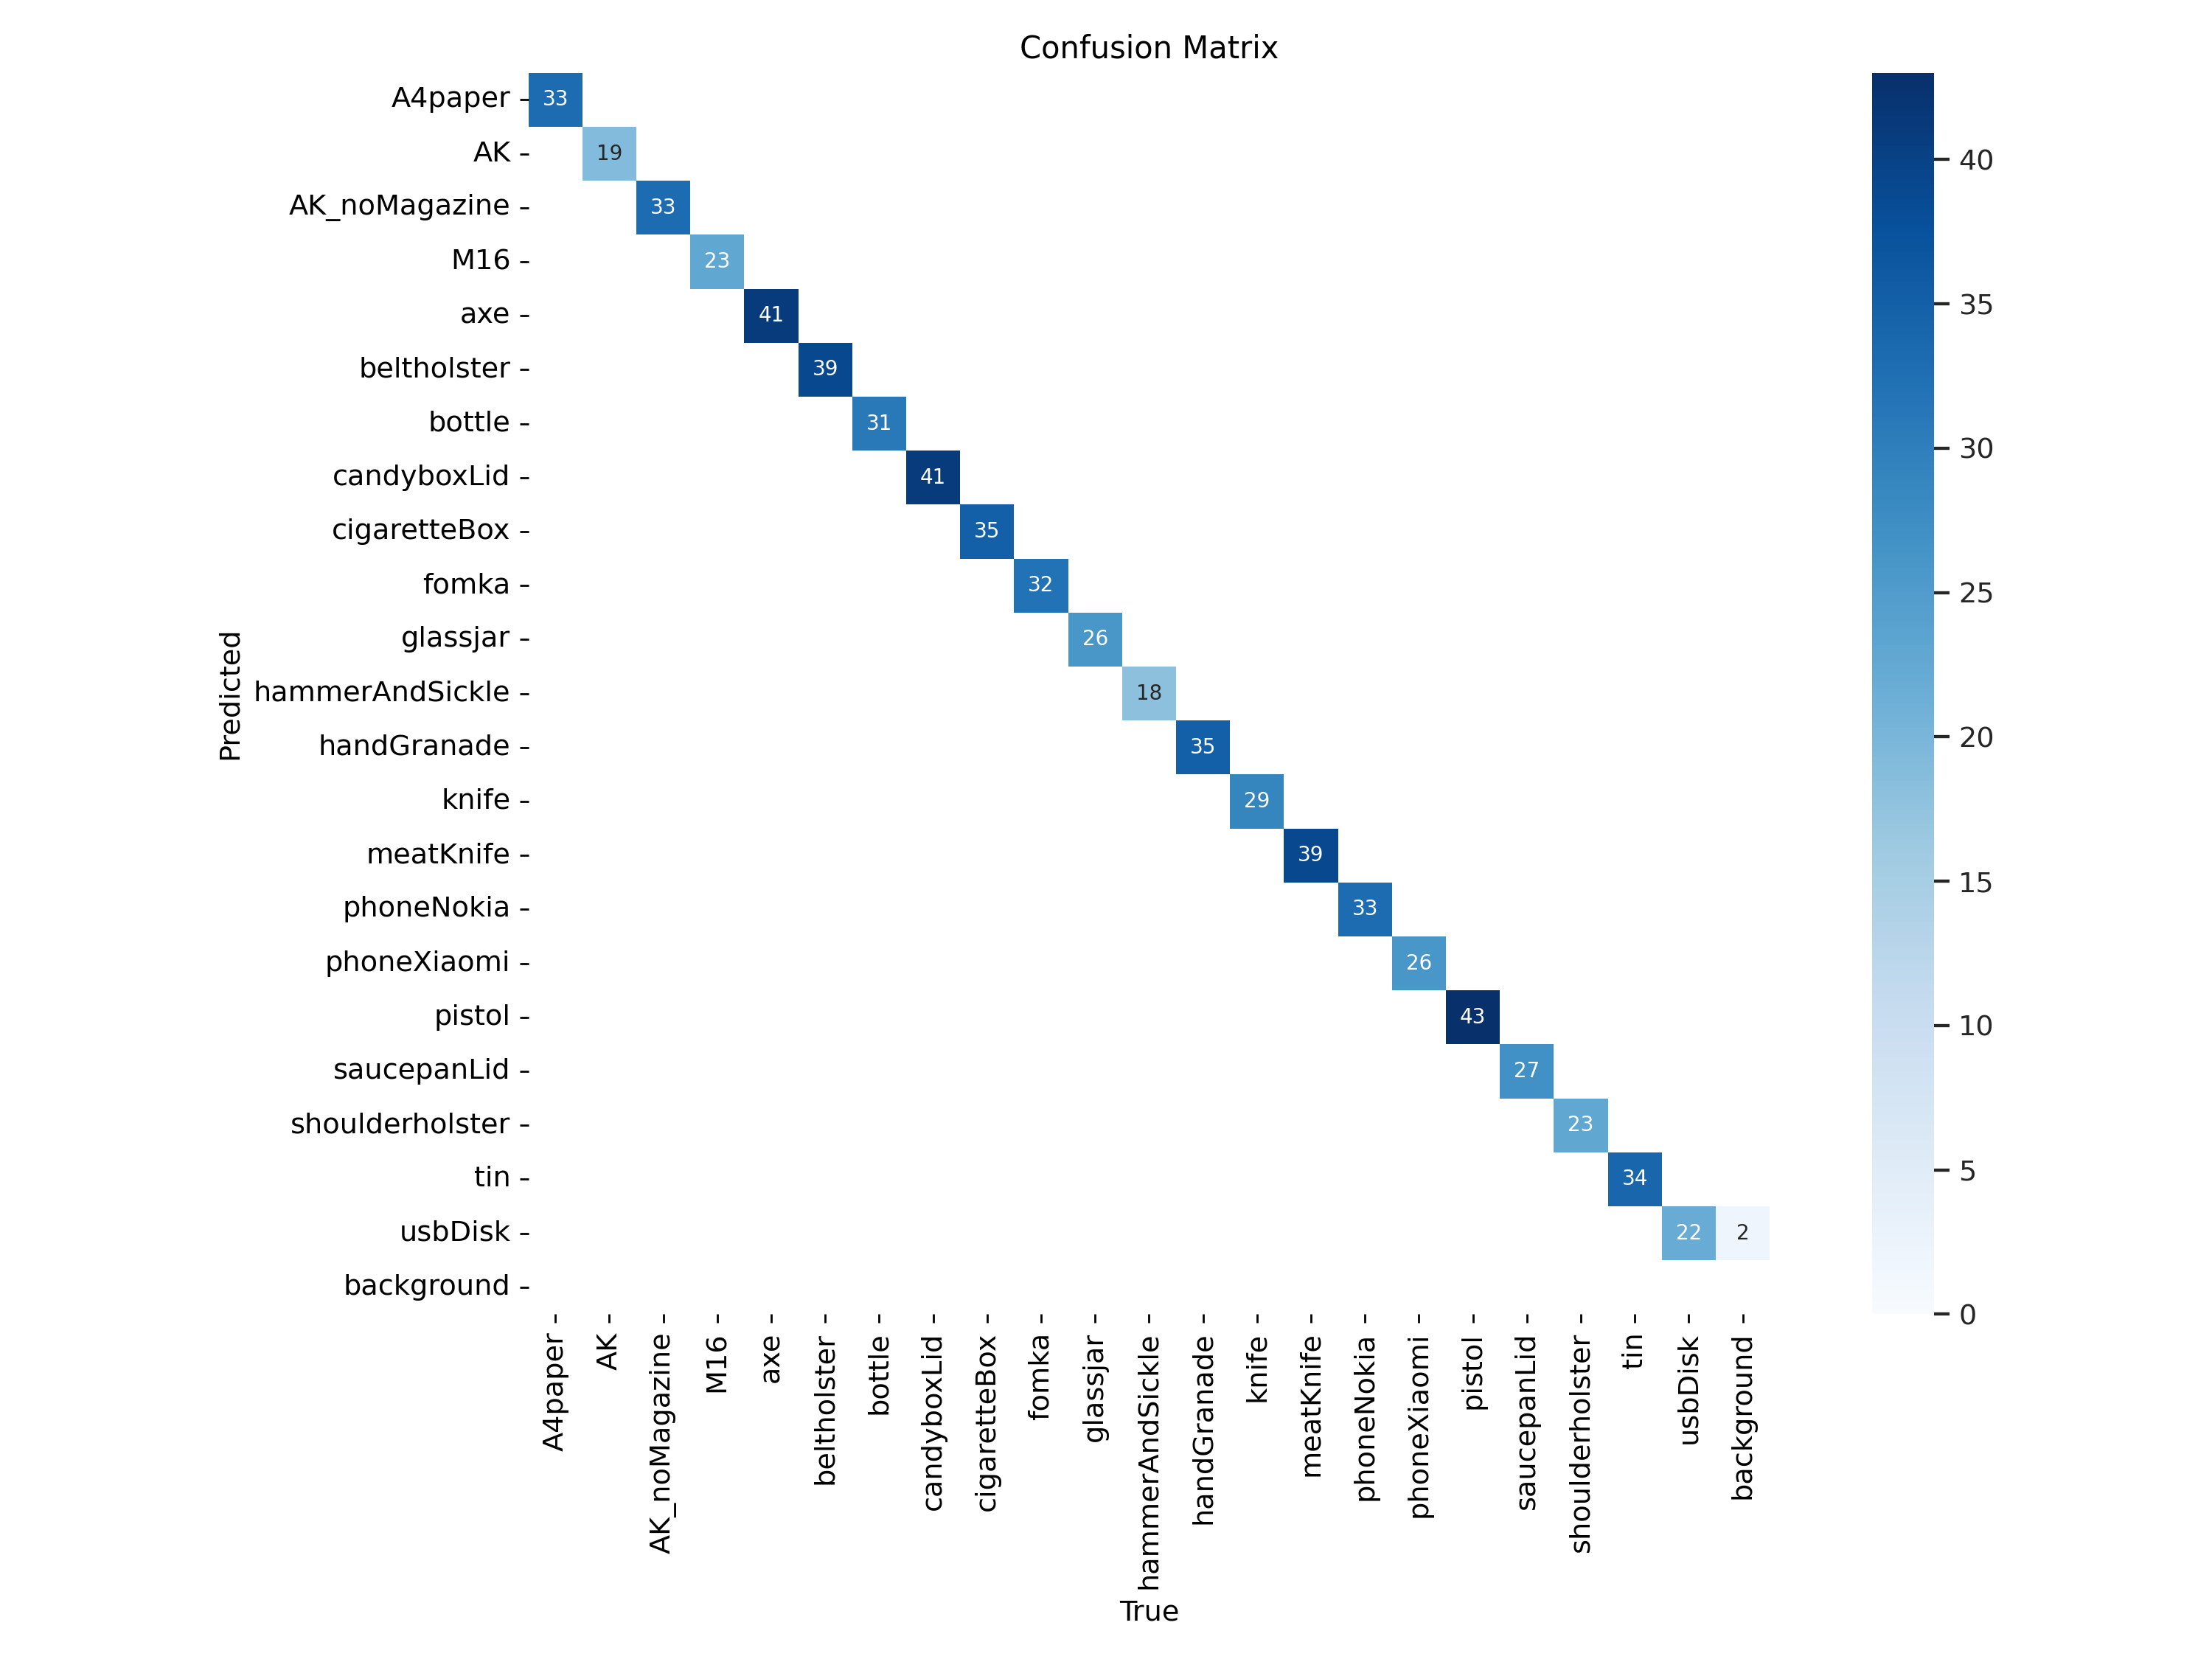

In [26]:
%cd {HOME}
Image(filename=f'//kaggle/working/runs/detect/yolov8/kaggle/working/runs/detect/yolov8m_results_results2/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}


/kaggle/working


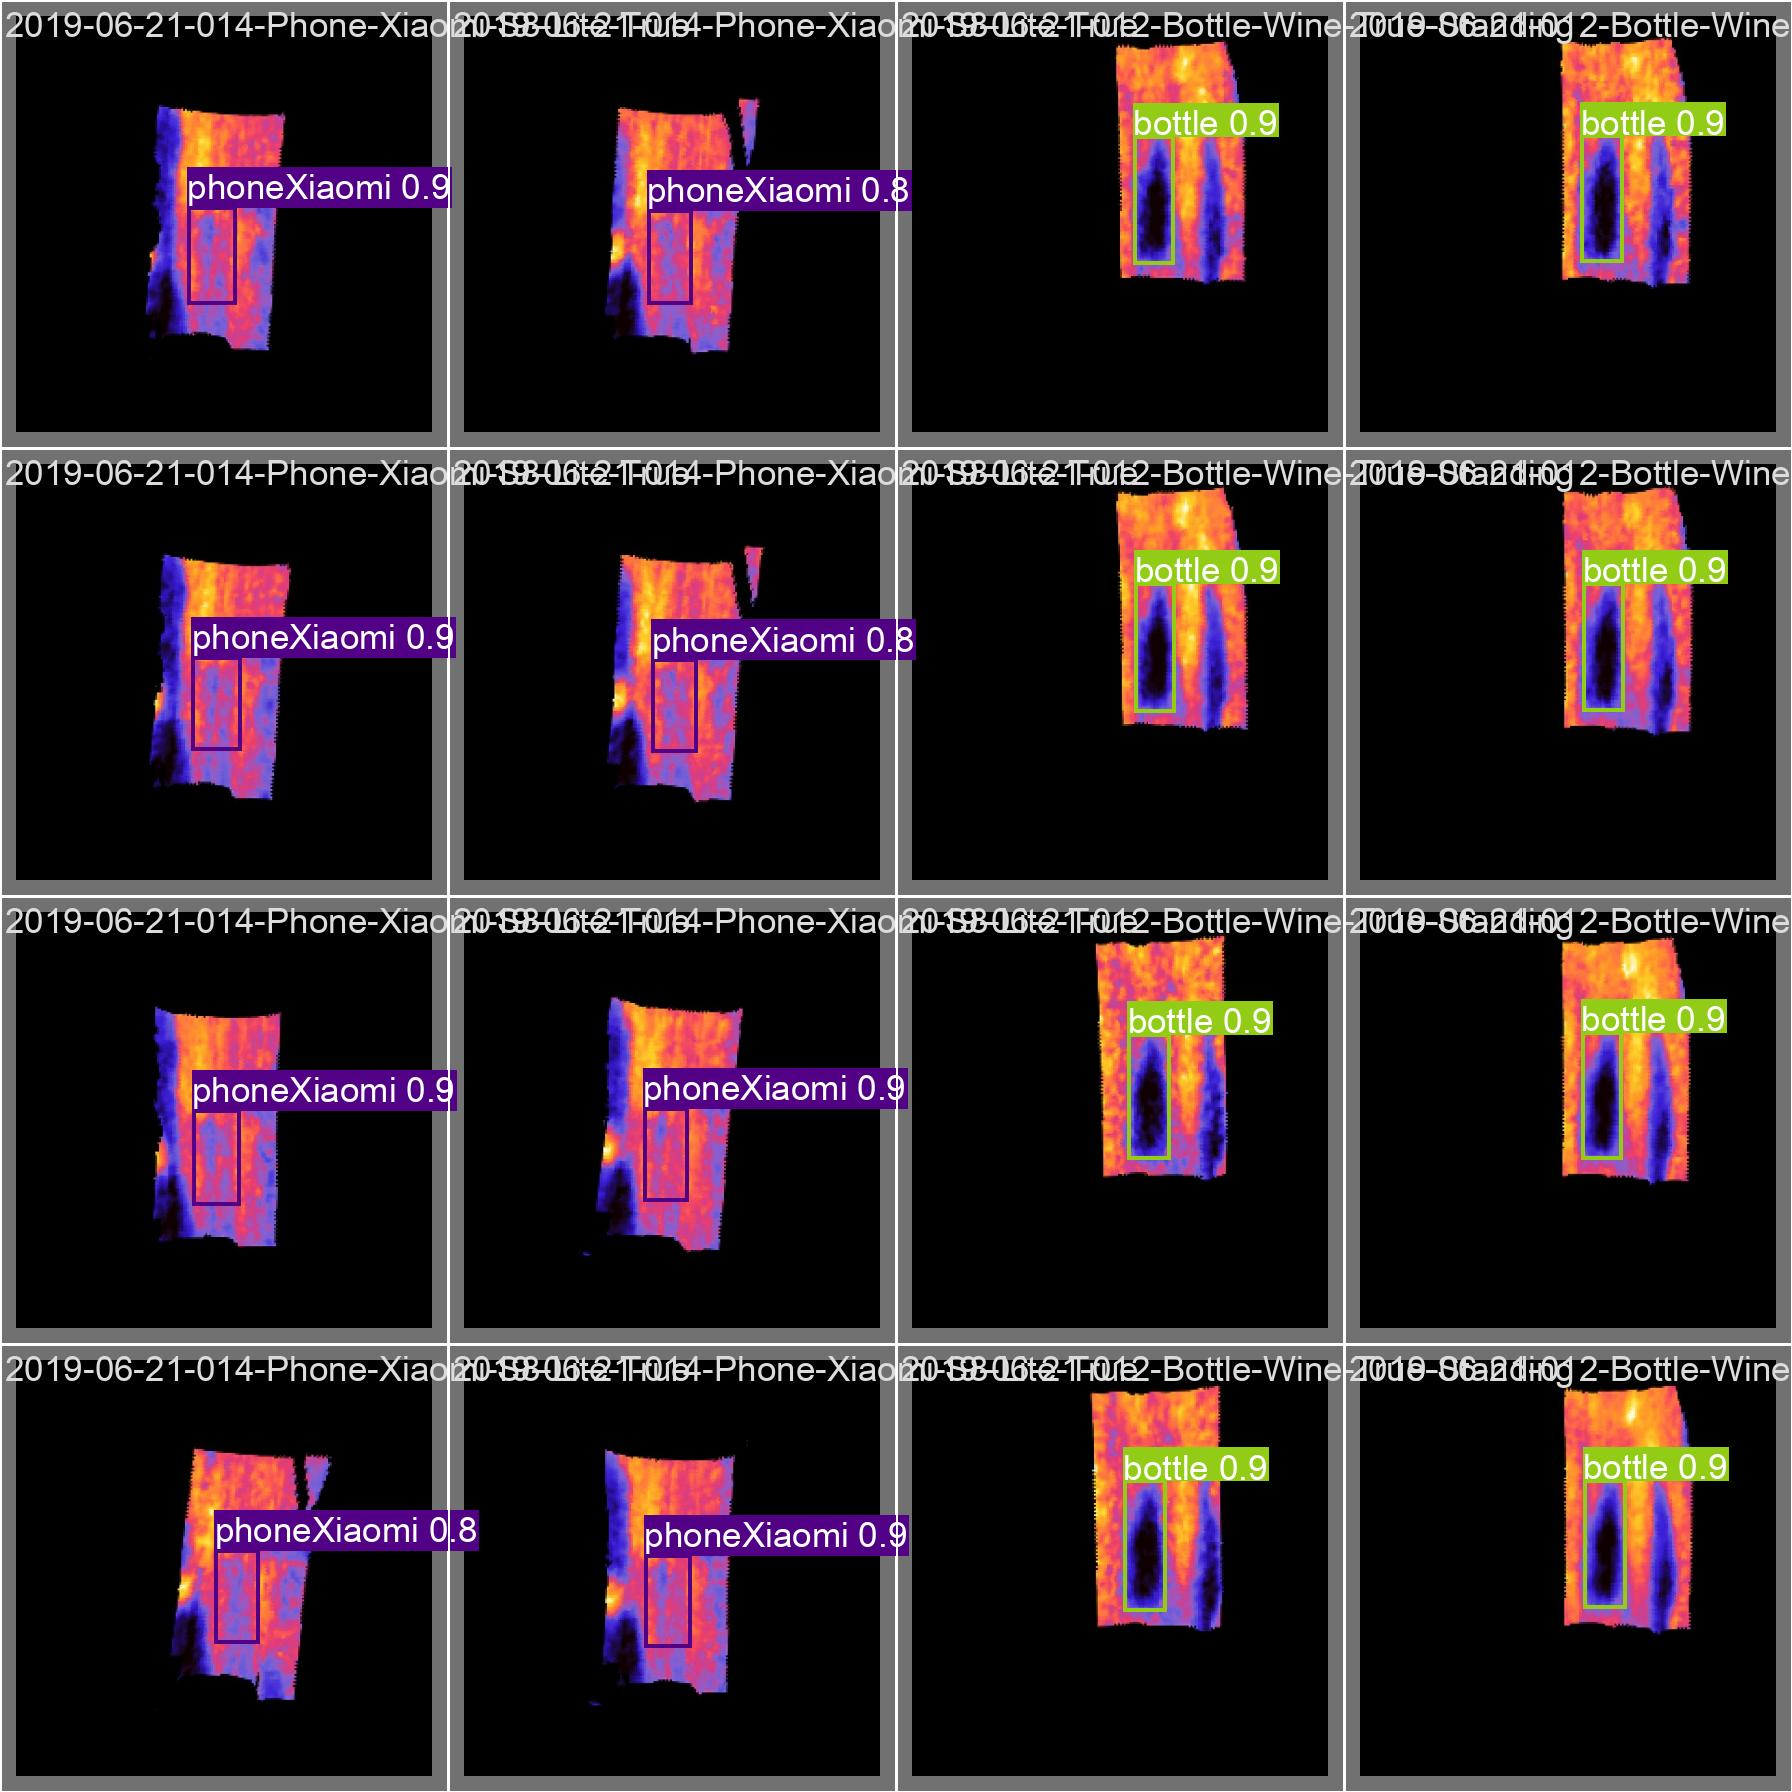

In [34]:
# Validation

%cd {HOME}
Image(filename=f'/kaggle/working/runs/detect/yolov8/kaggle/working/runs/detect/yolov8m_results_results2/val_batch0_pred.jpg', width=600)